In [74]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

PATH = "./data/titanic"
data = pd.read_csv(f'{PATH}/train.csv', index_col='PassengerId')
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


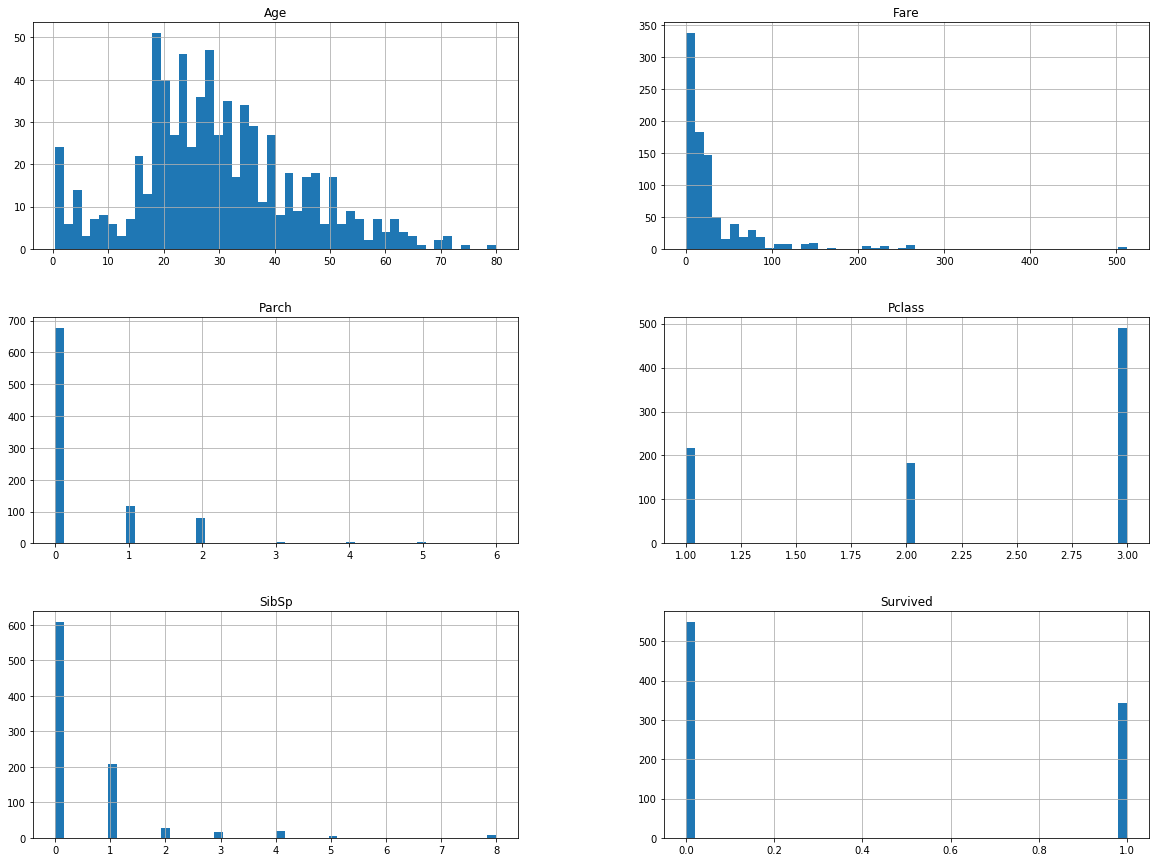

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
#1save_fig("attribute_histogram_plots")
plt.show()

In [22]:
data["Ticket"].value_counts()

1601               7
CA. 2343           7
347082             7
347088             6
3101295            6
CA 2144            6
382652             5
S.O.C. 14879       5
113760             4
4133               4
2666               4
17421              4
19950              4
347077             4
PC 17757           4
349909             4
W./C. 6608         4
LINE               4
113781             4
347742             3
345773             3
24160              3
110152             3
PC 17582           3
PC 17755           3
PC 17760           3
239853             3
363291             3
35273              3
C.A. 34651         3
                  ..
349233             1
343275             1
3101296            1
PC 17600           1
220367             1
113767             1
315037             1
C.A. 34260         1
13568              1
PC 17474           1
19952              1
112050             1
362316             1
350029             1
3460               1
113503             1
17466        

In [21]:
corMatrix = data.corr()
corMatrix["Survived"]

Survived    1.000000
Pclass     -0.338481
Age        -0.077221
SibSp      -0.035322
Parch       0.081629
Fare        0.257307
Name: Survived, dtype: float64

In [25]:
tData = data.copy()

In [26]:
tData.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [27]:
categories = data.select_dtypes(include=['object']).copy()
nonCats = data.select_dtypes(exclude=['object']).copy()

In [28]:
categories.head()

,Name,Sex,Ticket,Cabin,Embarked
PassengerId,,,,,
1,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
5,"Allen, Mr. William Henry",male,373450,NaN,S


In [29]:
nonCats.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,22.0,1,0,7.2500
2,1,1,38.0,1,0,71.2833
3,1,3,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,0,3,35.0,0,0,8.0500


In [30]:
encodedCats = pd.get_dummies(categories, columns=["Sex", "Ticket", "Cabin", "Embarked"], prefix=["Sex", "Ticket", "Cabin", "Embarked"])

In [37]:
tData = nonCats.join( encodedCats)

In [39]:
cMatrix = tData.corr()

In [44]:
cMatrix["Survived"].sort_values()

Sex_male              -0.543351
Pclass                -0.338481
Embarked_S            -0.155660
Age                   -0.077221
Ticket_CA. 2343       -0.070234
Ticket_347082         -0.070234
Ticket_CA 2144        -0.064988
Ticket_3101295        -0.064988
Ticket_347088         -0.064988
Ticket_S.O.C. 14879   -0.059292
Ticket_382652         -0.059292
Ticket_W./C. 6608     -0.053002
Ticket_349909         -0.053002
Ticket_4133           -0.053002
Ticket_239853         -0.045876
Ticket_345773         -0.045876
Ticket_7534           -0.037436
Ticket_2678           -0.037436
Ticket_239865         -0.037436
Ticket_244252         -0.037436
Ticket_PC 17593       -0.037436
Cabin_F G73           -0.037436
Ticket_A/4 48871      -0.037436
Cabin_C124            -0.037436
Ticket_W./C. 6607     -0.037436
Ticket_364849         -0.037436
Ticket_2691           -0.037436
Ticket_S.O./P.P. 3    -0.037436
Ticket_358585         -0.037436
Ticket_250647         -0.037436
                         ...   
Ticket_2

In [45]:
tData.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Ticket_110152,Ticket_110413,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.352413,0.647587,0.003367,0.003367,...,0.002245,0.003367,0.003367,0.001122,0.002245,0.004489,0.001122,0.188552,0.086420,0.722783
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990,0.477990,0.057961,0.057961,...,0.047351,0.057961,0.057961,0.033501,0.047351,0.066890,0.033501,0.391372,0.281141,0.447876
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [335]:
from sklearn.model_selection import train_test_split
def transform(d, isTrainSet=True):
    d = d.drop("Ticket", axis=1)
    d['Has_Cabin'] = d["Cabin"].apply(lambda x: 1 if x else 0)
    d = d.drop("Cabin", axis=1)
    categories = d.select_dtypes(include=['object']).copy()
    nonCats = d.select_dtypes(exclude=['object']).copy()
    print(d.dtypes)
    encodedCats = pd.get_dummies(categories, columns=["Sex",  "Embarked"], prefix=["Sex",  "Embarked"])
    transformed = nonCats.join( encodedCats)
    transformed = transformed.drop("Name", axis=1)
    if isTrainSet:
        labels = transformed["Survived"].copy().values
        transformed = transformed.drop("Survived", axis=1)
    print(transformed.shape)
    if isTrainSet:
        X_train, X_test, y_train, y_test = train_test_split(transformed, labels, test_size=0.2, random_state=42, stratify=labels)
        return transformed, labels
        #return X_train, X_test , y_train, y_test
    else:
        return transformed

In [199]:
#tData, test_set, y, test_y = transform(data)
tData, y = transform(data)
#print(tData.shape, test_set.shape, y.shape, test_y.shape)
#print(tData.dtypes)

Survived       int64
Pclass         int64
Name          object
Sex           object
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Embarked      object
Has_Cabin      int64
dtype: object
(891, 11)
(712, 11) (179, 11) (712,) (179,)


In [200]:
list(tData.columns.values)
tData.head()

,Pclass,Age,SibSp,Parch,Fare,Has_Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
693,3,NaN,0,0,56.4958,1,0,1,0,0,1
482,2,NaN,0,0,0.0000,1,0,1,0,0,1
528,1,NaN,0,0,221.7792,1,0,1,0,0,1
856,3,18.0,0,1,9.3500,1,1,0,0,0,1
802,2,31.0,1,1,26.2500,1,1,0,0,0,1


In [201]:
from sklearn.base import BaseEstimator, TransformerMixin
# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [209]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer


column_names = list(tData.columns.values)
pipeline = Pipeline([
        ('selector', DataFrameSelector(column_names)),
        ('imputer', Imputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])


from sklearn.pipeline import FeatureUnion
transformations = [("pipeline", pipeline)]

full_pipeline = FeatureUnion(transformer_list=transformations)
train_set_prepared = full_pipeline.fit_transform(tData)
print(train_set_prepared.shape)
train_set_prepared[0]

(712, 11)


array([ 0.82956755, -0.08113533, -0.46508428, -0.46618317,  0.5138115 ,
        0.        , -0.74242727,  0.74242727, -0.49252705, -0.28933346,
        0.61631563])

In [208]:
y.shape

(712,)

# check predictions on test set

## load test data

In [210]:
# check predictions on test set

full_test_pipeline = FeatureUnion(transformer_list=transformations)
test_set_prepared = full_test_pipeline.fit_transform(test_set)
print(test_set_prepared.shape)
print(test_y.shape, test_y.dtype)
print('test ratio: ',np.where(test_y == 0)[0].size/test_y.size,'train : ',y.size, 'ratio : ', np.where(y == 0)[0].size/y.size)

(179, 11)
(179,) int64
test ratio:  0.6145251396648045 train :  712 ratio :  0.6165730337078652


In [337]:
# confusion matrix, and other scores
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
def check_model(y, prediction, model_name):
    acc = accuracy_score(y, prediction)
    print("accuracy         ", acc)
    confusion = confusion_matrix(y, prediction)
    print("confusion", confusion[1][1])
    print(confusion)
    plt.matshow(confusion, cmap=plt.cm.gray)
    plt.show()
    p = precision_score(y, prediction)
    print("precision_score  ", p)
    r= recall_score(y, prediction)
    print("recall_score     ", r)
    f1= f1_score(y, prediction)
    print("f1               ", f1)
    return pd.DataFrame({
        'Name': [model_name],
        'Accuracy': [acc],
        'ConfusionTN': [confusion[0][0]],
        'ConfusionFP': [confusion[0][1]],
        'ConfusionFN': [confusion[1][0]],
        'ConfusionTP': [confusion[1][1]],
        'Precision': [p]
        ,
        'Recoil': [r]
    })

modelResults = []
models = []

# Stochastic gd

In [279]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=42)
sgd_clf.fit(train_set_prepared, y)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [280]:
#test_y_predict = sgd_clf.predict(test_set_prepared)

accuracy          0.7094972067039106
confusion 49
[[78 32]
 [20 49]]


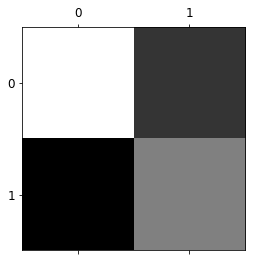

precision_score   0.6049382716049383
recall_score      0.7101449275362319
f1                0.6533333333333334


In [282]:
 #modelResults.append(check_model(test_y, test_y_predict, 'Stochastic gradiant descent'))
 models.append(('stgardient', sgd_clf))

In [283]:
# accuracy on cross validation set
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, train_set_prepared, y, cv=3, scoring="accuracy")

array([0.58823529, 0.75527426, 0.74683544])

# Random Forest

In [338]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=250, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(train_set_prepared, y)
scores = cross_val_score(rnd_clf, train_set_prepared, y, cv=4, scoring="accuracy")
#test_y_predict = rnd_clf.predict(test_set_prepared)
#modelResults.append(check_model(test_y, test_y_predict, 'Random Forest'))
models.append(('rf', rnd_clf))
scores

array([0.82122905, 0.79775281, 0.82022472, 0.81920904])

# Extra tree

In [339]:

from sklearn.ensemble import ExtraTreesClassifier

eet_clf = ExtraTreesClassifier(n_estimators=250, max_leaf_nodes=16, n_jobs=-1, random_state=42)
eet_clf.fit(train_set_prepared, y)
scores = cross_val_score(eet_clf, train_set_prepared, y, cv=4, scoring="accuracy")

#test_y_predict = eet_clf.predict(test_set_prepared)
#modelResults.append(check_model(test_y, test_y_predict, 'Extra Tree'))
models.append(('eet', eet_clf))
scores

array([0.81564246, 0.76966292, 0.79213483, 0.81920904])

# Fine tune random forest

In [327]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [10, 100, 250, 500, 1000], 'max_leaf_nodes': [ 4, 8, 16, 32]}
  ]
forest_clf = RandomForestClassifier()
#grid_search = GridSearchCV(forest_clf, param_grid, cv=5,scoring='accuracy')
#grid_search.fit(train_set_prepared, y)
print("done")

done


In [328]:
grid_search.best_params_

{'max_leaf_nodes': 16, 'n_estimators': 250}

In [330]:
print("hello")

hello


# Decision tree

accuracy          0.770949720670391
confusion 36
[[102   8]
 [ 33  36]]


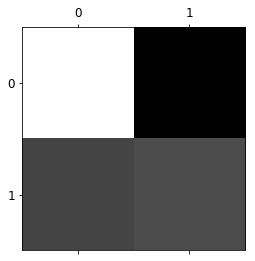

precision_score   0.8181818181818182
recall_score      0.5217391304347826
f1                0.6371681415929203


In [286]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_clf.fit(train_set_prepared, y)

#test_y_predict = tree_clf.predict(test_set_prepared)
#modelResults.append(check_model(test_y, test_y_predict, 'Decision tree'))
models.append(('tree', tree_clf))

# neural net

In [362]:
from sklearn.neural_network import MLPClassifier
nn_clf = MLPClassifier(early_stopping=True, alpha= 0.1, hidden_layer_sizes= 400, max_iter= 250)
nn_clf.fit(train_set_prepared, y)
scores = cross_val_score(nn_clf, train_set_prepared, y, cv=4, scoring="accuracy")
models.append(('nn', nn_clf))
scores

array([0.75977654, 0.80337079, 0.79213483, 0.75706215])

accuracy          0.8044692737430168
confusion 43
[[101   9]
 [ 26  43]]


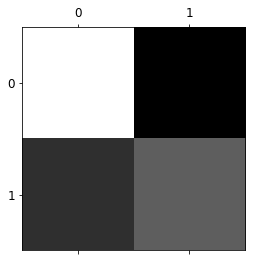

precision_score   0.8269230769230769
recall_score      0.6231884057971014
f1                0.7107438016528926


In [320]:
#test_y_predict = nn_clf.predict(test_set_prepared)
#modelResults.append(check_model(test_y, test_y_predict, 'neural net'))
models.append(('nn', nn_clf))

In [365]:
from sklearn.neural_network import MLPClassifier
nn_clf = MLPClassifier(alpha= 1e-03, hidden_layer_sizes= 600, max_iter= 500)
nn_clf.fit(train_set_prepared, y)
scores = cross_val_score(nn_clf, train_set_prepared, y, cv=4, scoring="accuracy")
models.append(('nn', nn_clf))
scores

array([0.82122905, 0.81460674, 0.86516854, 0.8079096 ])

# fine tune nn

In [355]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'max_iter': [250, 500, 1000, 100], 'hidden_layer_sizes': [ 10, 30, 75, 100, 200, 400], 'alpha': [0.000001, 0.0001, 0.01, 0.1]}
  ]
nn_clf1 = MLPClassifier(early_stopping=False)
grid_search = GridSearchCV(nn_clf1, param_grid, cv=5,scoring='accuracy')
grid_search.fit(train_set_prepared, y)
print("done")

/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr

done


/usr/local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [354]:
grid_search.best_params_

{'alpha': 0.1, 'hidden_layer_sizes': 400, 'max_iter': 250}

In [360]:
grid_search.best_params_

{'alpha': 1e-06, 'hidden_layer_sizes': 100, 'max_iter': 100}

# Voting Classifier

In [342]:

from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
    estimators=models,
    voting='hard')
voting_clf.fit(train_set_prepared, y)
cross_val_score(voting_clf, train_set_prepared, y, cv=3, scoring="accuracy")

/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([0.81512605, 0.83966245, 0.82700422])

accuracy          0.7988826815642458
confusion 39
[[104   6]
 [ 30  39]]


/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


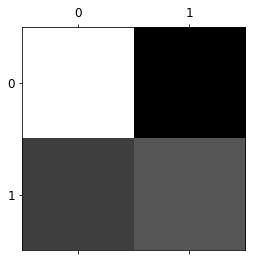

precision_score   0.8666666666666667
recall_score      0.5652173913043478
f1                0.6842105263157895


In [323]:
voting_clf.fit(train_set_prepared, y)
#test_y_predict = voting_clf.predict(test_set_prepared)
#modelResults.append(check_model(test_y, test_y_predict, 'voting'))

# compare models

In [324]:
allResults = pd.concat(modelResults)
allResults

,Accuracy,ConfusionFN,ConfusionFP,ConfusionTN,ConfusionTP,Name,Precision,Recoil
0,0.798883,30,6,104,39,Random Forest,0.866667,0.565217
0,0.798883,28,8,102,41,Extra Tree,0.836735,0.594203
0,0.804469,26,9,101,43,neural net,0.826923,0.623188
0,0.798883,30,6,104,39,voting,0.866667,0.565217


# produce output

In [293]:
outData = pd.read_csv(f'{PATH}/test.csv', index_col='PassengerId')
outData.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [294]:
transformedOutData = transform(outData, False)

Pclass         int64
Name          object
Sex           object
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Embarked      object
Has_Cabin      int64
dtype: object
(418, 11)


In [295]:
transformedOutData.head(3)

,Pclass,Age,SibSp,Parch,Fare,Has_Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
892,3,34.5,0,0,7.8292,1,0,1,0,1,0
893,3,47.0,1,0,7.0000,1,1,0,0,0,1
894,2,62.0,0,0,9.6875,1,0,1,0,1,0


In [296]:
submit_set_prepared = full_pipeline.fit_transform(transformedOutData)
print(submit_set_prepared.shape)

(418, 11)


In [366]:
finalPredictions = nn_clf.predict(submit_set_prepared)
print("done")

done


In [367]:
StackingSubmission = pd.DataFrame({ 'PassengerId': outData.index,
                            'Survived': finalPredictions })
StackingSubmission.to_csv(f"{PATH}/predictionsfullTrainNN.csv", index=False)
print("the end")

the end
